# Post-Hoc Experimentation for the [Clickbait Challenge at SemEval 2023](https://pan.webis.de/semeval23/pan23-web/clickbait-challenge.html)


Clickbait posts link to web pages and advertise their content by arousing curiosity instead of providing informative summaries.
Clickbait spoiling aims at generating short texts that satisfy the curiosity induced by a clickbait post.
This notebook serves as tutorial on post-hoc experiments on the [Clickbait Challenge at SemEval 2023](https://pan.webis.de/semeval23/pan23-web/clickbait-challenge.html).

The following figure illustrates some example inputs and the expected output for clickbait spoiling:

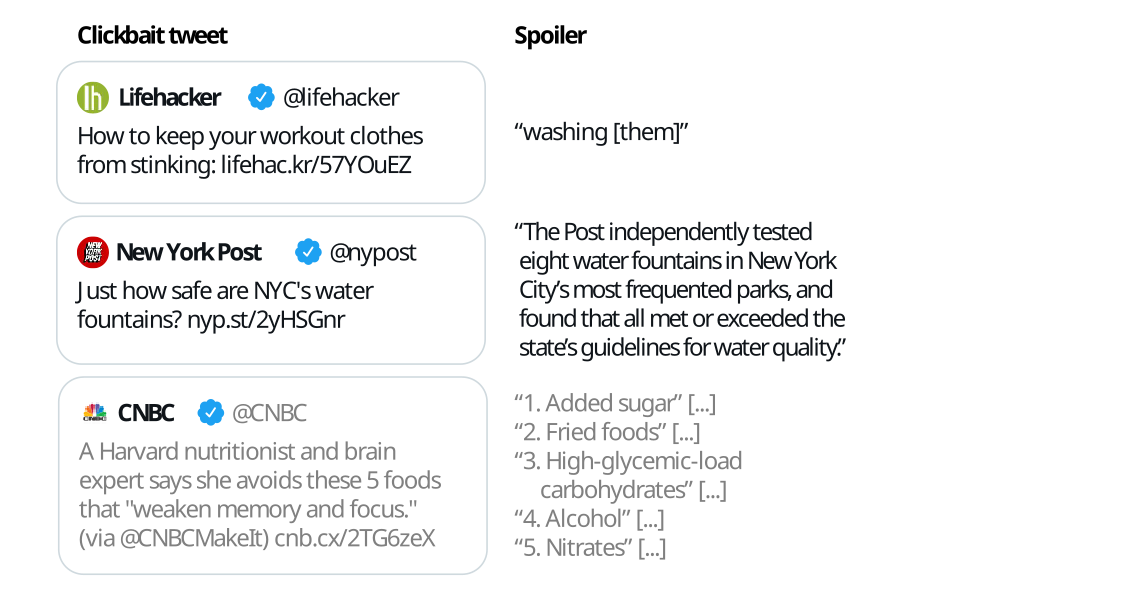

This notebook covers:

- 1.) Diving into artifacts submitted to the shared task
- 2.) Re-evaluation of submitted approaches (e.g., a different subset of the data or different measures)
- 3.) Execution of submitted approaches on new or manipulated data (e.g., for ablation studies or ensembles)

All software submissions and evaluators come as docker images.
Hence, you only need a minimal environment: `Python3` and `Docker`.

The installation of the environment is simplified with a virtual environment and executing `make jupyterlab` ([in the root of this repository](Makefile)) installs the virtual environment (if not already done) and starts the jupyter notebook ready to run all parts of the tutorial.

**This tutorial currently includes only the baselines as the shared task is currently running (to prevent side effects to participants). After completion of the shared task, all submitted approaches can be executed and evaluated (as they are all available in Docker images) as showcased with the baselines.***

### Import Requirements

In [1]:
import pandas as pd
import tira

pd.set_option('display.max_colwidth', 0)

# 1.) Overview of Artifacts submitted to the Shared Task

In [2]:
# Overview of evaluated approaches (Only baselines at the moment)
tira.all_evaluated_appraoches()

,approach,dataset,result-size,bleu-score,missing-predictions
0,clickbait-spoiling/princess-knight/express-pitch,task-2-spoiler-generation-validation-20220924-training,800,0.02111,0
1,clickbait-spoiling/princess-knight/express-pitch,task-2-spoiler-generation-validation-20220924-training,800,0.02111,0
2,clickbait-spoiling/princess-knight/express-pitch,task-2-spoiler-generation-validation-20220924-training,800,0.02111,0


In [3]:
# Overview of evaluators
tira.all_evaluators()

,dataset,image,command
0,task-1-type-classification-validation-20220924-training,webis/pan-clickbait-spoiling-evaluator:0.0.10,bash -c '/clickbait-spoiling-eval.py --task 1 --ground_truth_classes $inputDataset --input_run $inputRun --output_prototext ${outputDir}/evaluation.prototext'
1,task-2-spoiler-generation-validation-20220924-training,webis/pan-clickbait-spoiling-evaluator:0.0.10,bash -c '/clickbait-spoiling-eval.py --task 2 --ground_truth_spoiler $inputDataset --input_run $inputRun --output_prototext ${outputDir}/evaluation.prototext'


In [4]:
# Overview of submitted softwares (only baselines as the shared task is still ongoing)
tira.all_softwares()

,approach,team,image,command
0,clickbait-spoiling/princess-knight/express-pitch,princess-knight,docker.io/webis/clickbait-spoiling-submissions:princess-knight-naive-baseline-task2-0-0-1-tira-docker-software-id-genteel-upstream,/naive-baseline-task-2.py --input $inputDataset/input.jsonl --output $outputDir/run.jsonl
1,clickbait-spoiling/princess-knight/muffled-exponential,princess-knight,docker.io/webis/clickbait-spoiling-submissions:princess-knight-my-software-0-0-1-tira-docker-software-id-nimble-groove,"echo ""my final test number 4"""
2,clickbait-spoiling/princess-knight/shortest-keyword,princess-knight,docker.io/webis/clickbait-spoiling-submissions:princess-knight-my-software-0-0-1-tira-docker-software-id-solid-align,"echo ""hello world"""
3,clickbait-spoiling/princess-knight/potential-borzoi,princess-knight,docker.io/webis/clickbait-spoiling-submissions:princess-knight-naive-baseline-task2-0-0-1-tira-docker-software-id-icy-flag,/naive-baseline-task-2.py --input $inputDataset/input.jsonl --output $outputDir/run.jsonl
4,clickbait-spoiling/bg40lecu/absolute-officer,bg40lecu,docker.io/webis/clickbait-spoiling-submissions:bg40lecu-my-software-0-0-1-tira-docker-software-id-ebony-groove,sleep 3m
5,clickbait-spoiling/bg40lecu/radiant-history,bg40lecu,docker.io/webis/clickbait-spoiling-submissions:bg40lecu-my-software-0-0-1-tira-docker-software-id-linear-headset,ls
6,clickbait-spoiling/princess-knight/primary-anthology,princess-knight,docker.io/webis/clickbait-spoiling-submissions:princess-knight-naive-baseline-task1-0-0-1-tira-docker-software-id-augmenting-highway,/naive-baseline-task-1.py --input $inputDataset/input.jsonl --output $outputDir/run.jsonl


In [5]:
# Overview of all datasets
tira.all_datasets()

,dataset,records
1,task-1-type-classification-validation-20220924-training,800
0,task-2-spoiler-generation-validation-20220924-training,800


# 2.) Re-evaluation of submitted approaches

We run the approach `'clickbait-spoiling/princess-knight/express-pitch'` on the dataset `'task-2-spoiler-generation-validation-20220924-training'`.
There, `clickbait-spoiling` is the task,  `princess-knight` is the group, and `express-pitch` is the approach of the group (`princess-knight` is the group that submits all the baselines, and `express-pitch` is an baseline).

**This tutorial currently includes only the baselines as the shared task is currently running (to prevent side effects to participants). After completion of the shared task, all submitted approaches can be executed and evaluated (as they are all available in Docker images) as showcased with the baselines.***

In [6]:
predictions, evaluation = tira.run(
    'clickbait-spoiling/princess-knight/express-pitch',
    data='task-2-spoiler-generation-validation-20220924-training',
    evaluate=True
)

In [7]:
# Show some predictions of the approach 'clickbait-spoiling/princess-knight/express-pitch'

predictions.head(5)

,uuid,spoiler
0,6dc7ddef-4e8e-4a6b-9296-526377518071,Five Nights at Freddy’s Sequel Delayed for Weird Reason
1,435b24de-56f6-4d4e-9c38-54b8e0630aac,Why Arizona Sheriff Joe Arpaio’s fate could hang on a single word
2,8091ba93-6376-473a-9117-01d6cf0507e4,Here’s how much you should be tipping your hairdresser
3,8b713277-0e5b-4873-a216-b650f21f3b4c,"Alan Rickman & Rupert Grint On 'CBGB,' Reuniting Post-'Potter' And Favorite Halloween Costumes"
4,a2f91b65-c36c-481f-92b1-2fc77d6411fc,Man swallowed a microSD card and you won't believe what happened next!


In [8]:
# Show evaluation results for the approach 'clickbait-spoiling/princess-knight/express-pitch' on the full data 'task-2-spoiler-generation-validation-20220924-training'
evaluation

,approach,evaluate,result-size,bleu-score,missing-predictions
0,clickbait-spoiling/princess-knight/express-pitch,task-2-spoiler-generation-validation-20220924-training,800,0.02111,0


# 3.) Execution of submitted approaches on new or manipulated data

Executing software submitted to a shared task on new or manipulated data allows interesting evaluations not possible with run submissions.
For instance, how is the effectiveness if we run some approaches on different, but similar data (see 3.1.) or what happens if the data is slightly modified (e.g., if queries are reformulated?, see 3.2)

### 3.1.) Execution of submitted approaches on new data

We create a DataFrame that shows how the input data for an clickbait spoiling task should look like and apply the model 'clickbait-spoiling/princess-knight/express-pitch' to this new dataset.


In [9]:
# Here we create an new dataset consisting of two entries
df = pd.DataFrame([
    {"uuid": "example-1", "postText": ["This \"Star Wars\" theory about Rey will blow your mind"], "targetParagraphs": ["But a new theory has awakened: that Rey is in fact Emperor Palpatine's granddaughter."], "targetTitle": "This \"Star Wars\" Theory About Rey Is Insane", "spoiler": ["that Rey is in fact Emperor Palpatine's granddaughter"]},
    {"uuid": "example-2", "postText": ["J.K. Rowling has revealed a heartbreaking truth about Hagrid"], "targetTitle": "J.K. Rowling Has Revealed A Heartbreaking Truth About Hagrid",  "targetParagraphs": ["Rowling's response may point to the fact that the spell is simply too difficult for Hagrid, who was expelled from Hogwarts as a teenager, to perform. But fans were also worried that the lovable half-giant, abandoned by his mother as a child, may just not have enough happy memories to produce a Patronus. Oh, Hagrid!"], "spoiler": "not have enough happy memories to produce a Patronus"},
])

df

,uuid,postText,targetParagraphs,targetTitle,spoiler
0,example-1,"[This ""Star Wars"" theory about Rey will blow your mind]",[But a new theory has awakened: that Rey is in fact Emperor Palpatine's granddaughter.],"This ""Star Wars"" Theory About Rey Is Insane",[that Rey is in fact Emperor Palpatine's granddaughter]
1,example-2,[J.K. Rowling has revealed a heartbreaking truth about Hagrid],"[Rowling's response may point to the fact that the spell is simply too difficult for Hagrid, who was expelled from Hogwarts as a teenager, to perform. But fans were also worried that the lovable half-giant, abandoned by his mother as a child, may just not have enough happy memories to produce a Patronus. Oh, Hagrid!]",J.K. Rowling Has Revealed A Heartbreaking Truth About Hagrid,not have enough happy memories to produce a Patronus


In [10]:
# Apply some approach to the dataset to get the predictions and the evaluation on the new data
predictions, evaluation = tira.run('clickbait-spoiling/princess-knight/express-pitch', data=df, evaluate='task-2-spoiler-generation')

In [11]:
# Show the predictions of the approach 'clickbait-spoiling/princess-knight/express-pitch' on the new dataset
predictions

,uuid,spoiler
0,example-1,"This ""Star Wars"" Theory About Rey Is Insane"
1,example-2,J.K. Rowling Has Revealed A Heartbreaking Truth About Hagrid


In [12]:
# Show evaluation results for the approach 'clickbait-spoiling/princess-knight/express-pitch' on the new dataset
evaluation

,approach,evaluate,result-size,bleu-score,missing-predictions
0,clickbait-spoiling/princess-knight/express-pitch,task-2-spoiler-generation-validation-20220924-training,2,5.122457e-232,0


### 3.2.) Execution of submitted approaches on manipulated data

Executing the submitted software on slightly modified data allows for ablation studies error analysis.

In the following example, we apply the approach 'clickbait-spoiling/princess-knight/express-pitch' when the post text is always an empty string.
This allows to assess the impact of the posts text on the final effectiveness.

In [13]:
# Manipulate the dataset for an ablation study: Has the postText an impact on the effectiveness? We remove the postText and then evaluate the approaches.

df = tira.load_data('task-2-spoiler-generation-validation')

pd.set_option('display.max_colwidth', 50)

# We set the post text always to the empty string
df['postText'] = ''
df.head(2)

,uuid,postId,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,targetMedia,targetUrl,provenance,spoiler,spoilerPositions,tags
0,6dc7ddef-4e8e-4a6b-9296-526377518071,800048986762423_885081814925806,,Facebook,[Five Nights at Freddy’s creator Scott Cawthon...,Five Nights at Freddy’s Sequel Delayed for Wei...,Five Nights at Freddy's creator Scott Cawthon ...,None,[https://gamerant.com/wp-content/uploads/five-...,https://gamerant.com/five-nights-at-freddys-se...,"{'source': 'anonymized', 'humanSpoiler': 'They...",[some of the plot elements are so disturbing t...,"[[[2, 158], [2, 236]]]",[passage]
1,435b24de-56f6-4d4e-9c38-54b8e0630aac,4jp20e,,reddit,[© REUTERS/Laura Segall Maricopa County Sherif...,Why Arizona Sheriff Joe Arpaio’s fate could ha...,"<p>A single word — ""intentionally"" — could tra...",None,[https://archive.is/0eGBT/bbf6d79b366fc7e75b8b...,https://archive.is/0eGBT,"{'source': 'anonymized', 'humanSpoiler': '""Int...","[""intentionally"", could transform a court case...","[[[0, 197], [0, 212]], [[0, 215], [0, 328]]]",[multi]


In [14]:
# Apply some approach to the manipulated dataset (postText removed) to get the predictions and the evaluation on the manipulated data
predictions, evaluation = tira.run('clickbait-spoiling/princess-knight/express-pitch', data=df, evaluate='task-2-spoiler-generation')

In [15]:
# Show the predictions of the approach 'clickbait-spoiling/princess-knight/express-pitch' on the manipulated dataset
predictions.head(3)

,uuid,spoiler
0,6dc7ddef-4e8e-4a6b-9296-526377518071,Five Nights at Freddy’s Sequel Delayed for Wei...
1,435b24de-56f6-4d4e-9c38-54b8e0630aac,Why Arizona Sheriff Joe Arpaio’s fate could ha...
2,8091ba93-6376-473a-9117-01d6cf0507e4,Here’s how much you should be tipping your hai...


In [16]:
# Show evaluation results for the approach 'clickbait-spoiling/princess-knight/express-pitch' on the new dataset
evaluation

,approach,evaluate,result-size,bleu-score,missing-predictions
0,clickbait-spoiling/princess-knight/express-pitch,task-2-spoiler-generation-validation-20220924-...,800,0.02111,0
